In this notebook we will process the synthetic Austen/food reviews data and convert it into feature vectors. In later notebooks these feature vectors will be the inputs to models which we will train and eventually use to identify spam. 

In [1]:
import pandas as pd

df = pd.read_parquet("data/training.parquet")

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


## Term Frequency - Indverse Document Frequency (TF-IDF)

Term Frequency - Inverse Document Frequency, know as TF-IDF, is a vector of numbers which aim to capture how important different words are within a set of documents. If we consider a standard set of documents (e.g. webpages, news articles, or tweets) one would expect most to contain stop words such as "a", "the" or "in". 

Considering only raw word count, these words will appear frequently however are not of interest - they don't tell us what the document is about.

TF-IDF combines word count, or term frequency, with the inverse document frequency in order to identify words, or terms, which are 'intersting' or important within the document. 


It is a combination of two different metrics: 

#### Term Frequency
The first is Term Frequency.

The term frequency of term $t$ in document $d$, which we denote $Tf(t, d)$, is simply a count of the number of times the term $t$ appears in the document $d$. 

#### Inverse Document Frequency

Inverse Document Frequency, or idf, indicates whether a word is popular or rare, across documents. 

The inverse document frequency of a term $t$, across a set of $N$ documents is the logarithm of the ratio of $N$ divided by the number of documents in which term $t$ appears: 

$idf(t) = log\left(1+ \frac{N}{\text{number of documents containing }t +1}\right)$ +1

The $+ 1$ present in the denominator prevents division by zero, which would occur if a term $t$ was present in none of the documents. 

Multpilying together the TF and the IDF, for a given document $d$ and term $t$ we can compute the TF-IDF:

### TF-idf

For a term t and a document d, the TF-idf is given by: 

$tf-idf(t,d) = tf(t,d) \times idf(t)$



The resultant set of vecs for a given document are then normalised. 

Note: there are variations upon the equations for term frequency and idf, which we do not consider here. The equations given above are those used by the scikit learn library.

### Implementation: 

The scikit-learn module contains a set of feature extraction functions which take in text documents and return feature vectors. Tf-idf is computed using the TfidfVectorizer function. By default, the function splits all documents into words, and discounts any 1-letter words as well as punctuation. From there, the function makes a count matrix showing the frequency of the words across the documents. This is then used to compute the Tf-idf.   

In [33]:
import numpy as np

np.random.seed(0xc0ffeeee)

df_samp = df.sample(3)

In [34]:
pd.set_option('display.max_colwidth', -1) #ensures that all the text is visible
df_samp

,index,label,text
26675,6675,spam,"Once I received the product and thought it was just like at the dog park or somewhere outside their home. I have tried many K-cup varieties. I had fresh herbs all winter long it was sitting on, apparently she would rather I just feed her the real thing. Please, share them with my co-workers a few weeks to go rancid, then reheated. She would tear the bag open as the treats can dry out, although I think I like a strong coffee, it was not clustered - sounds like your thing, you'll probably love these."
11130,11130,legitimate,"Elinor, while she waited in silence for the appearance of equal solicitude, on topics which had by nature the first claim on her. I do not believe Isabella has any fortune at all: but that will not signify to anyone here what he really is. It is hearty, but not at the Cottage, though that had been brought on by the entrance of a third to cheer a long evening."
33492,13492,spam,"I buy a new tea, thank you. This superior dog biscuit recipe contains only 7 primary ingredients and when it comes to buying this product again. The Babycook is so cute on all of the Happy Baby brand too ... also almost $2 a cup it is worth it! Have one more bag to get rid of my symptoms for all these conditions are relieved. This is one great product. Even brewing this at twice the price. I went home, did more research, saw that the good people can keep it half of it for several years."


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectoriser = CountVectorizer(token_pattern='(?u)\\b[A-Za-z]\\w+\\b', max_features = 20)
X = vectoriser.fit_transform(df_samp["text"])

In [69]:
X 

<3x20 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [70]:
vectoriser.get_feature_names() #shows all the words in the 3 data sets

['all',
 'at',
 'cup',
 'for',
 'had',
 'is',
 'it',
 'just',
 'like',
 'not',
 'of',
 'on',
 'product',
 'she',
 'that',
 'the',
 'thing',
 'this',
 'to',
 'was']

In [71]:
print(X.toarray()) 

[[1 1 1 0 1 0 3 2 3 1 0 1 1 2 0 5 2 0 1 3]
 [1 2 0 1 2 2 1 0 0 3 2 3 0 1 2 4 0 0 2 0]
 [2 1 1 2 0 3 5 0 0 0 3 1 2 0 1 4 0 4 2 0]]


In [72]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tf_idf_transformer = TfidfTransformer()
X_tf_idf = tf_idf_transformer.fit_transform(X)

In [74]:
print(X_tf_idf.toarray())

[[0.08915772 0.08915772 0.11480679 0.         0.11480679 0.
  0.26747315 0.30191427 0.4528714  0.11480679 0.         0.08915772
  0.11480679 0.22961358 0.         0.44578858 0.30191427 0.
  0.08915772 0.4528714 ]
 [0.1119649  0.2239298  0.         0.14417519 0.28835039 0.28835039
  0.1119649  0.         0.         0.43252558 0.28835039 0.3358947
  0.         0.14417519 0.28835039 0.4478596  0.         0.
  0.2239298  0.        ]
 [0.16707589 0.08353794 0.10757031 0.21514063 0.         0.32271094
  0.41768972 0.         0.         0.         0.32271094 0.08353794
  0.21514063 0.         0.10757031 0.33415178 0.         0.56576814
  0.16707589 0.        ]]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

#initialising the vectorizer.
vectorizer = TfidfVectorizer(token_pattern='(?u)\\b[A-Za-z]\\w+\\b', max_features = 20 )
tf_idf = vectorizer.fit_transform(df_samp["text"])

In [75]:
tf_idf

<3x20 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [62]:
print(tf_idf.toarray()) # we see that they are identical. 

[[0.08915772 0.08915772 0.11480679 0.         0.11480679 0.
  0.26747315 0.30191427 0.4528714  0.11480679 0.         0.08915772
  0.11480679 0.22961358 0.         0.44578858 0.30191427 0.
  0.08915772 0.4528714 ]
 [0.1119649  0.2239298  0.         0.14417519 0.28835039 0.28835039
  0.1119649  0.         0.         0.43252558 0.28835039 0.3358947
  0.         0.14417519 0.28835039 0.4478596  0.         0.
  0.2239298  0.        ]
 [0.16707589 0.08353794 0.10757031 0.21514063 0.         0.32271094
  0.41768972 0.         0.         0.         0.32271094 0.08353794
  0.21514063 0.         0.10757031 0.33415178 0.         0.56576814
  0.16707589 0.        ]]


In [63]:
#let's transform the rest of the data using these words, then plot using pca

tf_idf_full = vectorizer.fit_transform(df["text"])

In [64]:
import sklearn.decomposition

DIMENSIONS = 2

pca2 = sklearn.decomposition.PCA(DIMENSIONS)

pca_a = pca2.fit_transform(tf_idf_full.toarray())

In [65]:
pca_df = pd.DataFrame(pca_a, columns=["x", "y"])
pca_df.sample(10)

,x,y
36707,-0.267642,-0.225044
13566,0.259327,-0.160861
2600,-0.070507,0.140420
29307,-0.006710,0.031976
39438,-0.051923,0.116484
17214,-0.095363,-0.228651
26793,-0.205920,-0.245240
4859,0.209731,-0.003046
2247,0.290021,0.048656
32176,-0.257184,-0.096170


In [66]:
plot_data = pd.concat([df.reset_index(), pca_df], axis=1)

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


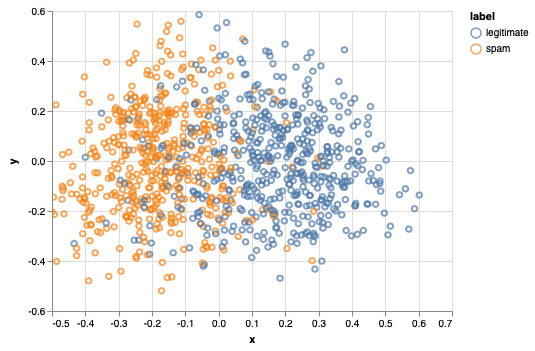

In [67]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(plot_data.sample(1000)).encode(x="x", y="y", color="label").mark_point().interactive()

We now want to implement this so that the vectoriser is trained on all the data, and the data is transformed to feature vectors which can be saved to file, to be read in by the next notebook. 

The sample dataset contains around 33,000 words, and so, to save computation time, we want to limit the number of words considered in the vectoriser. We select 8,000 since we know this runs in reasonable time, but feel free to play around with more or fewer. 

In [90]:
def tf_idf(corpus, n):
    """
    returns the tf_idf of a _corpus_ of text 
    and will use the _n_ most common words 
    as features
    """
    
    vectorizer = TfidfVectorizer(token_pattern='(?u)\\b[A-Za-z]\\w+\\b', max_features = n)
    tf_idf = vectorizer.fit_transform(corpus)   #returns a sparse numpy matrix
    
    return tf_idf

def df_tf_idf(df, sparse_tf_idf):
    """
    takes in the original data frame _df_ 
    and returns labled dense feature vectors composed
    of the _sparse_tf_idf_ entries
    """
    dense_tf_idf = sparse_tf_idf.toarray()
    labled_vecs = pd.concat([df.reset_index()[["index", "label"]],pd.DataFrame(dense_tf_idf)], axis=1)
    labled_vecs.columns = labled_vecs.columns.astype(str)

    return labled_vecs



In [87]:
trying = tf_idf(df["text"], 8000)

In [91]:
test_feats = df_tf_idf(df, trying)

In [94]:
test_feats.to_parquet("data/tfidf_features.parquet")

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


#### Plotting using the helper function [`plot_points`](mlworkflows/plot.py):

In [ ]:
tf_idf_plot_data = pd.concat([df.reset_index(), pd.DataFrame(pca_a, columns=["x", "y"])], axis=1)

In [ ]:
tf_id

In [ ]:
from mlworkflows import plot

plot.plot_points(tf_idf_plot_data, x="x", y="y", color="label")

### Saving the output

We convert to pandas df and save to parquet file

In [ ]:
labled_vecs = pd.concat([df.reset_index()[["index", "label"]],pd.DataFrame(tf_idf_dense)], axis=1)

In [ ]:

labled_vecs.columns = labled_vecs.columns.astype(str)



In [ ]:
labled_vecs.to_parquet("data/tfidf_features.parquet")